# Unsteady 1D- advection equation


We consider a fluid flowing in a narrow tube.  We use $q$ to indicate the density of the fluid and $u$ to indicate its velocity.  Both of these are functions of space and time: $q = q(x,t)$; $u=u(x,t)$.  

We can write the **differential conservation law** of mass

$$\dfrac{\partial q}{\partial t} +  \dfrac{\partial F(x,t)}{\partial x} = 0$$

with $F$, the mass rate of flow, called the _advective flux_. As it is just mass times velocity: $F=u q$, we obtain the **continuity equation**

$$\dfrac{\partial q}{\partial t} +  \dfrac{\partial uq}{\partial x} = 0.$$

In general, we need another equation to determine the velocity $u(x,t)$, as the full set of equations of fluid dynamics. But for now let's consider the simplest case, in which all of the fluid flows at a single, constant velocity $u(x,t)=a$ in $[m/s]$.  
Then the continuity equation becomes the **advection equation**

$$\boxed{\dfrac{\partial q}{\partial t} + a \dfrac{\partial q}{\partial x} = 0}$$

If we give the density distribution $q(x,t=0)=q_0(x)$ at initial time, then the exact  solution is just the function

$$q(x,t) = q_0(x-at)$$.

We consider two types of initial condition
* a smooth initial condition  $q_0(x) = e^{-200 \, (x-0.2)^2}$ ;
* a discontinuous initial condition $q_0(x) = 1$ for $0.7 < x <0.9$ and  $q_0(x) = 0$ elsewhere.

The aim of this practical is to solve the advection equation. For simplicity, we suppose that we wish to solve the advection equation on the space interval $[0,1]$. Periodic boundary condition ($q(x=0,t)=q(x=1,t)$) is applied at the frontier of the domain. We take $a=1$.

The discrete solution of the advection equation will be calculated for time going from 0 to 2.


### 1. import all the modules we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

### 2.  set up a grid, the initial condition and the exact solution

Let's plot the exact solution of the advection equation on the interval $[0,1]$ for the _smooth_ initial condition.

We use 100 grid points to discretize the physical domain $[0,1]$ and 50 instants to cover the time lapse. 

**Questions**

1. <span style="color:blue"> complete the function q_0(x) to calculate the initial condition ; </span> 
1. <span style="color:blue"> complete the function q_exact(x,t) to calculate the exact solution ; </span> 
1. <span style="color:blue"> run the two types of visualization to have a feel for how the solution behaves. </span> 


In [2]:
# Numerical parameters

# ----------------------------------------------

# Space
# Space iterations
N = 100
x = np.linspace(0, 1, N)  # Spatial grid
dx = 1./len(x)

# ----------------------------------------------

# Time
# Initial and final time
t0 = 0.
T  = 2.

Nt = 50
dt = (T-t0)/Nt

t = np.linspace(t0, T, Nt+1)

# ----------------------------------------------

# Advection speed
a = 1.

In [3]:
# Q1 - Initial smooth function

def q_0(x):                
    
    """  Smooth initial condition = Gaussian function """
    
    return np.exp(-200*(x-0.2)**2)


In [4]:
# Q2 - Exact function

def q_exact(x, t, a):
    
    """  Exact solution with periodic boundary conditions """
    
    Q = np.empty((len(t), len(x)))
    
    for n in np.arange(len(t)):
        for i in np.arange(len(x)):
            Q[n,i] = q_0(np.mod((x[i]-a*t[n]), max(x))) # mod(a, max(x)) = a%1 as max(x) = 1. We represent the signal until we get to x%1 (=max(x)) = 0
    return Q
            
Q = q_exact(x, t, a)

Below is the code to plot the spatio-temporal diagram of the exact solution. The colormap indicates the variation of $q(x,t)$.

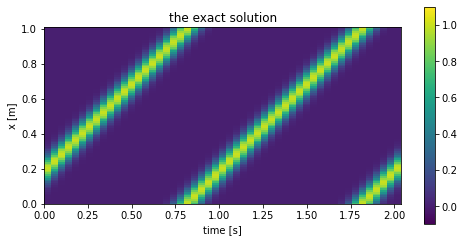

In [5]:
# Q3 run the cell

def spatio_temp(t, x, dt, dx, Q, filename, title):
    
    tp1 = np.append(t, t[-1] + dt)
    xp1 = np.append(x, x[-1] + dx)

    QT = np.transpose(Q)

    plt.figure(figsize = (8, 4))
    plt.pcolormesh(tp1, xp1, QT, cmap='viridis', vmin=-0.1, vmax=1.1, rasterized=True)
    plt.colorbar()
    plt.axis('image')

    plt.title(title)
    plt.xlabel('time [s]')
    plt.ylabel('x [m]')

    plt.savefig(filename, bbox_inches='tight', dpi=100)
    plt.show()
    
    return

# ----------------------------------------------

# Display results  

t = np.linspace(t0, T, Nt+1)

Q = q_exact(x, t, a)

spatio_temp(t, x, dt, dx, Q, "image_exact.png", 'the exact solution')

As we stated a = 1, we see that the solution to advection equation is constant along a line of slope 1.

Finally, let's make an animation of the solution.  It will take a few moments to run this code.  You don't need to worry about understanding all of the plotting code below.  
Just play with the animation.

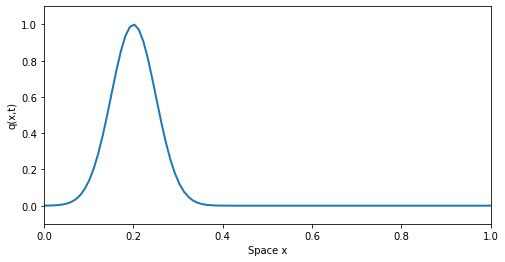

In [6]:
# Q3 run the cell

fig   = plt.figure(figsize = (8,4))    # Create an empty figure
ax    = plt.axes()
line, = ax.plot([], [],linewidth=2)  # Create an empty line plot

plt.axis((0,1, -0.1, 1.1))           # Set the bounds of the plot
plt.xlabel('Space x')
plt.ylabel('q(x,t)')

def plot_q(t):
    line.set_data(x, q_0(np.mod((x-a*t), 1))) # max(x) = 1  # Solution at time t

anim = animation.FuncAnimation(fig, plot_q, frames=t)  # Animate the solution
HTML(anim.to_jshtml())

## A finite difference method for advection

We can easily solve the advection equation exactly.  But the advection equation is a prototype for more complicated conservation laws that we will only be able to solve approximately by using numerical methods.  

The **advection equation** reads as

 $$\boxed{\dfrac{\partial q}{\partial t} + \dfrac{\partial F(x,t)}{\partial x}=0}$$ with $F(x,t) = a q(x,t)= F\left(q(x,t) \right)$. 
 
We introduce a set of equally spaced *grid points* of distance $\Delta_x$, and write $x_i$ to mean the location of the  $i^\textrm{th}$ point.  $n$ refers to the $n^{th}$ time step $(\Delta t )$ after the initial instant $t_0$. 

We write $q^n_i$ to denote the approximate value of the solution at the point $x_i$ and the time $t^n$.
In the discrete form, we take the following notations $$F(x_i,t^n)  = F\left(q_i^n \right)= F_i^n=a q_i^n$$



### 3. The simplest method 

First, we combine a forward scheme for time and a centered scheme for space. This gives
$$\dfrac{ q_i^{n+1} - q_i^{n}}{\delta t} +  \dfrac{ F^n_{i+1/2} - F^n_{i-1/2}}{\Delta x} = 0.$$

with $F^n_{i+1/2}=F(x_i+\Delta x/2,t)=a \, q(x_i+\Delta x/2,t)$.

As $q(x_i+\Delta x/2,t)$ is not known, we use an **_interpolation method_**. $\mathcal{F}$ is the resulting numerical interpolation of the flux. The method becomes

$$\boxed{\dfrac{ q_i^{n+1} - q_i^{n}}{\delta t} +  \dfrac{ \mathcal{F}(q^n_{i+1},q^n_{i}) - \mathcal{F}(q^n_{i},q^n_{i-1})}{\Delta x} = 0}.$$

Here we retain a **linear interpolation** between $x_i$ and $x_{i+1}$. With a regular grid, it gives: 
$F^n_{i+1/2} \approx \mathcal{F}(q^n_{i+1},q^n_{i})=\dfrac{1}{2} \left( F^n_{i} + F^n_{i+1}\right) $

hence, 
$$\dfrac{ q_i^{n+1} - q_i^{n}}{\delta t} +  \dfrac{ F^n_{i+1} - F^n_{i-1}}{2 \Delta x} = 0.$$

thus,
$$ \boxed{ q_i^{n+1} =   q_i^{n} - \dfrac{ \delta t}{2 \Delta x} \left( F^n_{i+1}-F^n_{i-1} \right) }$$ 

Below is an example code to solve the advection equation using this method.

We recall the _Courant-Friedrichs-Lewy_ criteria:  $\nu\leq 1$, where the Courant number $\nu$ is defined as 
$\nu=  \left| a \dfrac{\Delta t}{\Delta x} \right|$.

**Questions**

4. <span style="color:blue"> run cells below to visualize the behavior of the approximation method. Try different values of the Courant number $\nu$. (Take care to the number of time steps that has to be an integer!) Make a comment ; </span> 
4. <span style="color:blue"> write a matrix version of the solver using the divergence, interpolation and time derivative operators. The method construction secrion can help you. Complete the periodic BCs.
Verify that you obtain the same result as in question 4.</span> 
    
    *(Hint : use `sp.diags`, `.toarray()` from scipy and `np.eye`)*


In [7]:
# Q4 - Different values of nu

def q_fcs(a, x, dx, t0, tfin, dt):
    
    """  The forward centered scheme """
    
    q    = q_0(x).copy()
    qnew = q_0(x).copy()
    Q    = [q[:].copy()]
    
    tsca = t0

    while tsca < (tfin-dt):
    
        qnew[1:-1] = q[1:-1] - (a*dt)/(2*dx)*(q[2:] - q[:-2])

        # Periodic BCs:
        qnew[0]  = q[0] - (a*dt)/(2*dx)*(q[1] - q[-2])
        qnew[-1] = qnew[0]

        tsca += dt
        Q.append(qnew[:].copy())    # array containing q(x,t) at all points of the meshgrid and instants
        q     = qnew.copy()         # vector containing q(x,T)
    
    return (q, Q)

# a  = 1
# dx = 1/100 last checked

cflnum = 0.3          # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

print("Number of iterations : %.f" %(T/dt))

(q, Q)  = q_fcs(a, x, dx, t0, T, dt)

print('\nVerification stability : q(x=1,t_F) = ', q[-1])

Number of iterations : 667

Verification stability : q(x=1,t_F) =  14475937.472306428


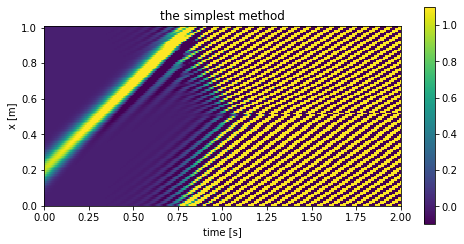

In [8]:
# Q4 - Spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q, "image_fcs.png", 'the simplest method')

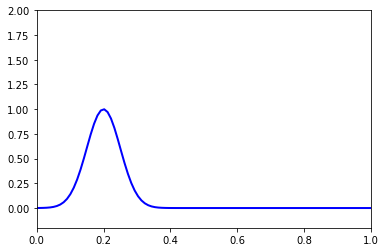

In [9]:
# Q4 - Animation

fig = plt.figure()
ax  = plt.axes(xlim=(0, 1), ylim=(-0.2,2))
line1, = ax.plot([],[],'-b',lw=2)

skip = 4

def fplot(i):
    line1.set_data(x[:], Q[i*skip])
    return line1,

anim = animation.FuncAnimation(fig, fplot, frames=range(len(Q)//skip))
HTML(anim.to_jshtml())

#### Q4 comment:

Very slow computation + slow movement of the wave. Eventually, for the tested values of cflnum, the solution gets unstable.

When the most stable : discontinuity right behind the wave. This numerical discontinuity might as well grow destructively for a ill-posed problem.

From experimental itearation with different cflnum : 

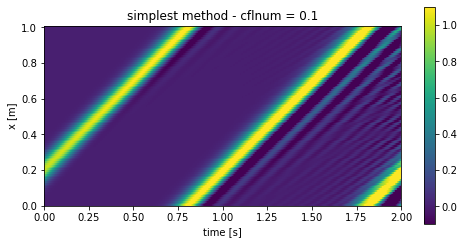

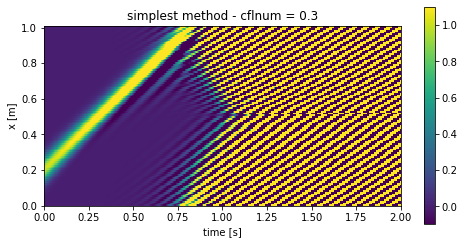

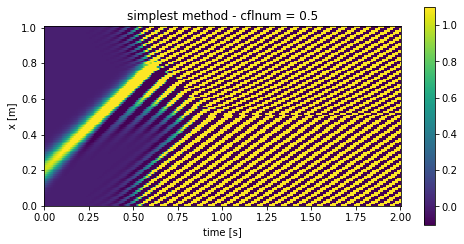

In [10]:
# Influence over cflnum

N = 3 # Number of cflnum to test out

cflnum = np.array([(2*k+1)*0.1 for k in range(N)])          # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

for delta_t in dt:
    (q, Q)  = q_fcs(a, x, dx, t0, T, delta_t)

    t = np.linspace(t0, T, int((T-t0)/delta_t+1))
    spatio_temp(t, x, delta_t, dx, Q, "image_fcs.png", "simplest method - cflnum = %.1f" %(a*delta_t/dx))

fig.tight_layout()    

We can see that the solution evolves destructively. Indeed, discontinuities can be observed, even in the case cflnum where discontinuities appear for x increasing.

These observations on the influence over cflnum can be expressed as well in function of a from the relation :

$$\nu = (cflnum) =  \left| a \dfrac{\Delta t}{\Delta x} \right| \leq 1$$

We then have that higher the a, i.e. higher than one, more destructive the solution gets.

The above condition looks to be necessary to ensure stability but not sufficient.

In [11]:
# Q5 - Matrix version

import scipy.sparse as sp

# --------------------------------------------------------

a      = 1
cflnum = 0.3          # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

# --------------------------------------------------------

def interp_lin_op(m, a):
    
    """ operator of linear interpolation 
            of the advective flux """
    
    AInt = sp.diags([a/2, a/2], [0, 1], (m-1, m)).toarray()
    
    return AInt

def diverg_op(m, dx):
    
    """ divergence operator """
    
    Div = sp.diags([-1, 1], [-1, 0], (m, m-1)).toarray()
    Div = Div * (1./dx)
    
    return Div

def time_deriv_op(m, dt):
    
    """ time derivative operator  """
    
    TM = np.eye(m) * (1./dt)
    
    coeff_t = dt
    
    return (TM, coeff_t)

def fcs_matrix(a, x, dx, dt):
    
    """  The forward centered scheme 
            matrix """
    
    m = len(x)
    
    # Method construction
    AInt = interp_lin_op(m, a)
    Div  = diverg_op(m, dx)
    (TM, coeff_t) = time_deriv_op(m, dt)
    
    A = coeff_t * (TM - Div@AInt)

    # periodic boundary conditions
    ## line (i = 0)
    A[0,:-1] = A[1,1:]
    A[0,-2]  = A[1,0]
    
    ## line (i = -1)
    A[-1,:]  = A[0,:]
    
    return (A)

def t_marching(A, x, t0, T, dt, q_init):
    
    """  The time marching """
    
    # initialisation
    tsca = t0
    
    q = q_init(x).copy()
    Q = [q[:].copy()]
    
    # time loop
    while tsca < (T-dt):

        qnew  = A@q
        tsca += dt

        Q.append(qnew[:].copy())    # array containing q(x,t) at all points of the meshgrid and instants
        q     = qnew.copy()         # vector containing q(x,T)

    return (q, Q)

A_fcs  = fcs_matrix(a, x, dx, dt)
(q, Q) = t_marching(A_fcs, x, t0, T, dt, q_0)

print('Verification stability : q(x=1,t_F) = ', q[-1]) 
print(A_fcs)

Verification stability : q(x=1,t_F) =  14475937.472319461
[[ 1.   -0.15  0.   ...  0.    0.15  0.  ]
 [ 0.15  1.   -0.15 ...  0.    0.    0.  ]
 [ 0.    0.15  1.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  1.   -0.15  0.  ]
 [ 0.    0.    0.   ...  0.15  1.   -0.15]
 [ 1.   -0.15  0.   ...  0.    0.15  0.  ]]


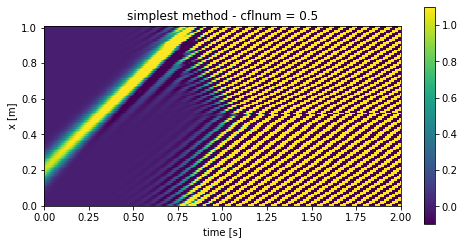

In [12]:
# Q5 - Spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q, "image_fcs_matrix.png", "simplest method - cflnum = %.1f" %(a*delta_t/dx))


#### Matrix Method - Bonus

In [13]:
# Matrix method - adapted to one case but not mathematically optimal, 
# as for example if we want to change only one component from the method

m = len(x)

# Matrix from system q^n+1 = A*q^n
A = np.eye(m, k=0) - (np.eye(m, k=+1) - np.eye(m, k=-1))*(a*dt/(2*dx))

# ----------------------------------------------------------

# Boundary conditions of periodicity

## line (i = 0)
A[0,:-1] = A[1,1:]
A[0,-2]  = A[1,0]
    
## line (i = -1)
A[-1,:]  = A[0,:]

# ----------------------------------------------------------

tsca = t0
    
q = q_0(x).copy()
Q = [q[:].copy()]
    
# time loop
while tsca < (T-dt):

    qnew  = A@q
    tsca += dt

    Q.append(qnew[:].copy())    # array containing q(x,t) at all points of the meshgrid and instants
    q     = qnew.copy()         # vector containing q(x,T)


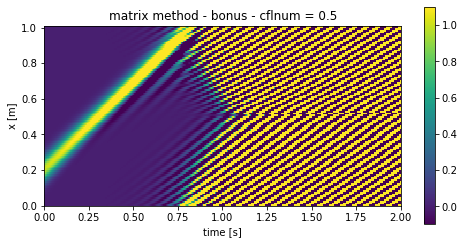

In [14]:
# Spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q, "image_fcs_matrix.png", "matrix method - bonus - cflnum = %.1f" %(a*delta_t/dx))

#### Matrix Method - End

### 4. The Lax-Friedrichs Method

The classical Lax–Friedrichs method replaces  $q_i^{n}$ by its linear interpolation:
$$ q_i^{n} =    \dfrac{1}{2} \left( q(x_{i-1},t) + q(x_{i+1},t)\right) $$.

It gives the form:
    
$$\boxed{ q_i^{n+1} =  \dfrac{1}{2} \left( q_{i-1}^n + q_{i+1}^n\right) - \dfrac{ \Delta t}{2 \Delta x} \left( F^n_{i+1}-F^n_{i-1} \right) }$$


This method can be rewriten as

$$\dfrac{ q_i^{n+1} - q_i^{n}}{\Delta t} +  \dfrac{ \mathcal{F}(q^n_{i+1},q^n_{i}) - \mathcal{F}(q^n_{i},q^n_{i-1})}{\Delta x} = 0$$

with $$\mathcal{F}(q^n_{i+1},q^n_{i}) = \dfrac{1}{2} \left( F^n_{i+1} + F^n_{i} \right) - \dfrac{\Delta x}{2 \Delta t} \left( q^n_{i+1} - q^n_{i} \right)$$

We can show that this formulation is close to the modeling of the advection-diffusion equation $\dfrac{\partial q}{\partial t} +
\dfrac{\partial F(x,t)}{\partial x}=\beta \dfrac{\partial^2 q}{\partial x^2}$ where $\beta$ is called the **numerical viscosity**.


**Questions**

6. <span style="color:blue"> write the function to calculate the new solution with the L-F method. Try different values of the Courant number $\nu$. Make a comment ; </span> 

6. <span style="color:blue"> demonstrate that $\beta = \dfrac{\Delta x^2}{2 \delta t}$ ;</span> 
    
6. <span style="color:blue"> once $\nu$ is fixed, what is the condition to make this method consistent with the original hyperbolic equation? Comment the quality of the solution.</span> 

#### Q6 - L-F method

In [15]:
# Numerical parameters

# ----------------------------------------------

# Space
# Space iterations
N = 100
x = np.linspace(0, 1, N)  # Spatial grid
dx = 1./len(x)

# ----------------------------------------------

# Time
# Initial and final time
t0 = 0.
T  = 2.

Nt = 50
dt = (T-t0)/Nt

t = np.linspace(t0, T, Nt+1)

# ----------------------------------------------

# Advection speed
a = 1.

In [16]:
# Q6 - Initial smooth function

def q_0(x):                
    
    """  Smooth initial condition = Gaussian function """
    
    return np.exp(-200*(x-0.2)**2)

In [17]:
# Q6. Lax Friedrich solver - V1


def q_LF(a, x, dx, t0, T, dt):
    
    """  The Lax-Friedrich method """
    
    q    = q_0(x).copy()
    qnew = q_0(x).copy()
    Q    = [q[:].copy()]
    
    tsca = t0

    while tsca < (T-dt):
    
        # qnew[1:-1] = (1/2)*(q[2:] + q[:-2]) - dt/(2*dx)*(q[2:] - q[:-2])
        qnew[1:-1] = .5*(q[2:]*(1 - dt/dx) + q[:-2]*(1 + dt/dx))

        # Periodic BCs:
        qnew[0] = .5*(q[1]*(1 - dt/dx) + q[-2]*(1 + dt/dx))
        qnew[-1] = qnew[0]

        tsca += dt
        Q.append(qnew[:].copy())    # array containing q(x,t) at all points of the meshgrid and instants
        q     = qnew.copy()         # vector containing q(x,T)
    
    return (q, Q)


# dx = 1/100 last checked
# a  = 1

cflnum = 0.5            # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

print("Number of iterations : %.f" %(T/dt))

(q, Q)  = q_LF(a, x, dx, t0, T, dt)

print('\nVerification stability : q(x=1,t_F) = ', q[-1])


Number of iterations : 400

Verification stability : q(x=1,t_F) =  0.13015858468064684


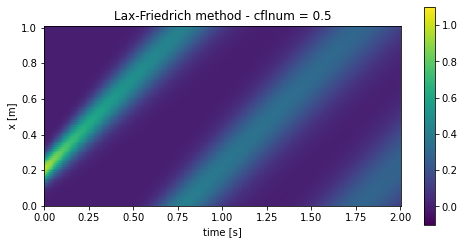

In [18]:
# Q6 spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q,"image_LF.png", 'Lax-Friedrich method - cflnum = %.1f' %cflnum)

##### Influence cflnum

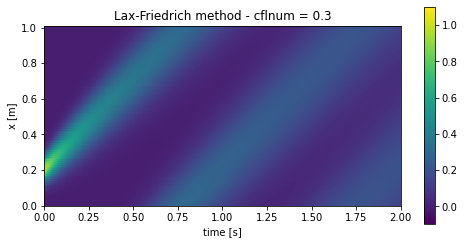

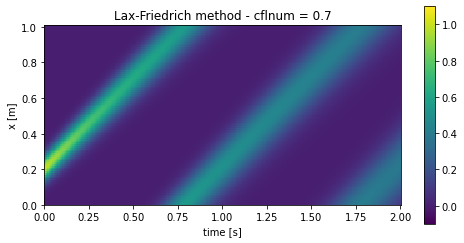

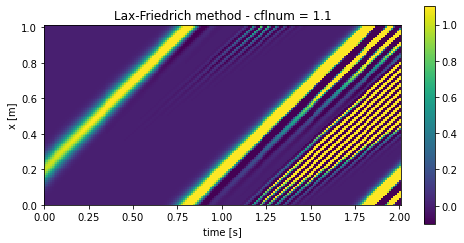

In [19]:
# Influence over cflnum

N      = 3 # Number of cflnum to test out
gap    = 2
offset = 0.2

cflnum = np.array([((gap*2)*k+1)*0.1+offset for k in range(N)])          # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

for delta_t in dt:
    (q, Q)  = q_LF(a, x, dx, t0, T, delta_t)

    t = np.linspace(t0, T, int((T-t0)/delta_t+1))
    spatio_temp(t, x, delta_t, dx, Q, "image_LF.png", "Lax-Friedrich method - cflnum = %.1f" %(a*delta_t/dx))

fig.tight_layout()    

##### Observation

As before, to increase the cfl number make the solution more and more discontinuous. Nevertheless, one can see here that the condition $\nu \leq 1$ is both necessary and sufficient. We then have a solution stable for the all mesh, even if it gets destructive for to high value (i.e. $\nu > 1$).

In fact, we here get closer to a physically consistent solution, and so the scheme acts as expected. We then see that the simple advection case holds for unphysical conditions (approximation of true form).

##### Matrix method

In [20]:
# Q6. Lax Friedrich solver - matrix formulation

import scipy.sparse as sp

# --------------------------------------------------------

a      = 1
cflnum = 0.5          # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

# --------------------------------------------------------

def interp_LF_op(a, m, dt, dx):
    
    """ operator of L-F interpolation 
            of the advective flux  """
    
    AInt = sp.diags([a+dx/dt, a-dx/dt], [0, 1], (m-1, m)).toarray()
    AInt = .5*AInt
    
    return AInt

def LFs_matrix(a, x, dx, dt):
    
    """  The Lax-Friedrich 
            matrix - forward scheme ? """
    
    m = len(x)
    
    # Method construction
    AInt = interp_LF_op(a, m, dt, dx)
    Div  = diverg_op(m, dx)
    (TM, coeff_t) = time_deriv_op(m, dt)
    
    A = coeff_t * (TM - Div@AInt)

    # periodic boundary conditions
    ## line (i = 0)
    A[0,:-1] = A[1,1:]
    A[0,-2]  = A[1,0]
    
    ## line (i = -1)
    A[-1,:]  = A[0,:]
    
    return (A)

A_LF = LFs_matrix(a, x, dx, dt)

print("Number of iterations : %.f" %(T/dt))

(q, Q) = t_marching(A_LF, x, t0, T, dt, q_0)

print('\nVerification stability : q(x=1,t_F) = ', q[-1]) 

Number of iterations : 400

Verification stability : q(x=1,t_F) =  0.13015858468064684


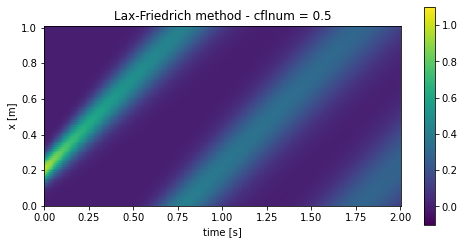

In [21]:
# Q6 spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q, "image_LF.png", 'Lax-Friedrich method - cflnum = %.1f' %cflnum)

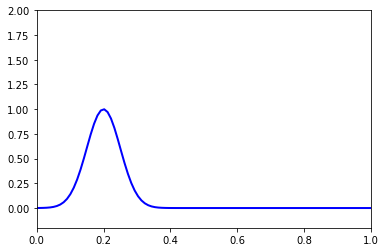

In [22]:
# Q6. live visualisation 

fig    = plt.figure()
ax     = plt.axes(xlim=(0, 1), ylim=(-0.2, 2))
line1, = ax.plot([],[], '-b', lw=2)

skip   = 4

def fplot(i):
    line1.set_data(x[:], Q[i*skip])
    return line1, 

anim = animation.FuncAnimation(fig, fplot, frames=range(len(Q)//skip))
HTML(anim.to_jshtml())

#### Comment

We have an attenuation of the function throughout time. Therefore, to have added a second order derivative term in space acts as a viscous term. We can then conclude on the fact that in hyperbolic differential equation, 2nd order derivative terms in space may act as term of attenuation, and more precisely viscous term, even though this might depend on the scheme considered.

To finish with this method, let's look at its consistency

#### Q7 - Demonstration $\beta$

We have the following second order differential equation :
    
$$\dfrac{\partial q}{\partial t} + \dfrac{\partial F(x,t)}{\partial x} = \beta \dfrac{\partial^2 q}{\partial x^2}$$
    
where $\beta$ is called the **numerical viscosity**.
    
By developpement of the differential terms independently :

$$\boxed{\dfrac{\partial q}{\partial t}} =  \dfrac{q_i^{n+1} - q_i^{n}}{\Delta t}$$

$$\boxed{\dfrac{\partial F(x,t)}{\partial x}} = \frac{F_{i+1/2}^{n} - F_{i-1/2}^{n}}{\Delta x} \approx \frac{F({q_{i+1}^n, q_{i}^n)} - F({q_{i}^n, q_{i-1}^n)}}{\Delta x}$$


$$\boxed{\beta \dfrac{\partial^2 q}{\partial x^2}} = \beta\frac{q_{i+1}^{n} - 2q_{i}^{n} - q_{i-1}^{n}}{\Delta x^2}$$

Which then gives the form:
    
$$\boxed{\dfrac{ q_i^{n+1} - q_i^{n}}{\Delta t} +  \dfrac{ \mathcal{F}(q^n_{i+1},q^n_{i}) - \mathcal{F}(q^n_{i},q^n_{i-1})}{\Delta x} = \beta\frac{q_{i+1}^{n} - 2q_{i}^{n} - q_{i-1}^{n}}{\Delta x^2}}$$

Noting that the classical Lax–Friedrichs method replaces $q_i^{n}$ by its linear interpolation, we have

$$ q_i^{n} = \dfrac{1}{2} ( q(x_{i-1},t) + q(x_{i+1},t)) :$$

$$\boxed{\dfrac{q_i^{n+1} - \frac{1}{2}(q_{i+1}^{n} - q_{i-1}^{n})}{\Delta t} +  \dfrac{ \mathcal{F}(q^n_{i+1},q^n_{i}) - \mathcal{F}(q^n_{i},q^n_{i-1})}{\Delta x} = 0}$$

and by identification :

$$-\frac{1}{2}(q_{i+1}^{n} - q_{i-1}^{n}) = - \frac{\beta}{\Delta x^2}(q_{i+1}^{n} - 2q_{i}^{n} - q_{i-1}^{n}) - \frac{q_i^n}{\Delta t}$$

$$\rightarrow \boxed{\beta = \frac{\Delta x^2}{2\Delta t}}$$

We can show that this formulation is close to the modeling of the advection-diffusion equation.

We are physically more consistent than the first hyperbolic method as we present here no discontinuities and qe furthermore present a physically consistent solution.

### 5. The Lax-Wendroff Method

The Lax–Wendroff method for the linear system $\dfrac{\partial q}{\partial t} + a \dfrac{\partial q}{\partial x} = 0$ is based on the Taylor series
expansion
$$q_i^{n+1} = q_i^n + \Delta t \dfrac{\partial q_i^n}{\partial t} 
+ \dfrac{(\Delta t)^2}{2} \dfrac{\partial^2 q_i^n}{\partial t^2} + \mathcal{O}(\Delta t^3)$$


From the advection equation, we have
$$\dfrac{\partial^2 q_i^n}{\partial t^2} = 
\dfrac{\partial }{\partial t} \left( \dfrac{\partial q_i^n}{\partial t}   \right) =
\dfrac{\partial }{\partial t} \left( - a \dfrac{\partial q_i^n}{\partial x}   \right) =
- a \dfrac{\partial }{\partial x} \left(  \dfrac{\partial q_i^n}{\partial t}   \right) =
-a  \dfrac{\partial }{\partial x} \left( - a \dfrac{\partial q_i^n}{\partial x}   \right) =
a^2 \dfrac{\partial^2 q_i^n}{\partial x^2}$$

Using these expressions in the Taylor development, we obtain

$$q_i^{n+1} = q_i^n -a \Delta t \dfrac{\partial q_i^n}{\partial x} 
+ \dfrac{( a \Delta t)^2}{2} \dfrac{\partial^2 q_i^n}{\partial x^2} + \mathcal{O}(\Delta t^3)$$

Keeping only the first three terms on the right-hand side and replacing the spatial derivatives
by central finite difference approximations gives the Lax–Wendroff method:

$$\boxed{ q_i^{n+1} = q_i^n -a \Delta t \dfrac{ q_{i+1}^n - q_{i-1}^n}{2 \Delta x} 
+ \dfrac{( a \Delta t)^2}{2} \dfrac{ q_{i+1}^n - 2 q_{i}^n + q_{i-1}^n}{\Delta x^2} }$$

This method can be re-interpreted as using the following interpolation formulation

$$\mathcal{F}^n_{i+1/2} = \dfrac{1}{2} \left( F^n_{i+1} + F^n_{i} \right) - \dfrac{a^2 \Delta t}{2 \Delta x} \left( q^n_{i+1} - q^n_{i} \right)$$

This time, the additional diffusive flux is chosen to exactly match what appears in the Taylor series expansion.

**Questions**

9. <span style="color:blue"> what is the order of accuracy of the method? What is dominant error? Compare with the Lax-Friedrich method. </span> 

9. <span style="color:blue"> calculate the new solution with the L-W method. Try different values of the Courant number $\nu$. Make a comment ; </span>     


##### Q9. order of accuracy

The Lax–Wendroff method for the linear system is based on the Taylor series
expansion. Then, using the Taylor development, we obtain

$$q_i^{n+1} = q_i^n -a \Delta t \dfrac{\partial q_i^n}{\partial x} 
+ \dfrac{( a \Delta t)^2}{2} \dfrac{\partial^2 q_i^n}{\partial x^2} + \mathcal{O}(\Delta t^3)$$

We now developp term by term to get back the above relation. By identification :

$$q_{i+1}^{n} = q_i^n + \Delta x \dfrac{\partial q_i^n}{\partial x} + \mathcal{O}(\Delta x^2)$$
$$q_{i-1}^{n} = q_i^n - \Delta x \dfrac{\partial q_i^n}{\partial x} + \mathcal{O}(\Delta x^2)$$

By combination :

$$ \boxed{\dfrac{\partial q_i^n}{\partial x}} = \dfrac{ q_{i+1}^n - q_{i-1}^n}{2 \Delta x} + \mathcal{O}(\Delta x^2)$$

And similarly :

$$q_{i+1}^{n} = q_i^n + \Delta x \dfrac{\partial q_i^n}{\partial x} 
+ \dfrac{(\Delta x)^2}{2} \dfrac{\partial^2 q_i^n}{\partial x^2} + \mathcal{O}(\Delta x^3)$$
$$q_{i-1}^{n} = q_i^n - \Delta x \dfrac{\partial q_i^n}{\partial x} 
+ \dfrac{(\Delta x)^2}{2} \dfrac{\partial^2 q_i^n}{\partial x^2} + \mathcal{O}(\Delta x^3)$$

And by combination

$$\boxed{\dfrac{\partial^2 q_i^n}{\partial x^2}} = \dfrac{ q_{i+1}^n - 2 q_{i}^n + q_{i-1}^n}{\Delta x^2} + \mathcal{O}(\Delta x^3)$$

As the scheme of the differential equation is driven by its lower order in time and space, we have 

$$q_i^{n+1} = q_i^n -a \Delta t \dfrac{ q_{i+1}^n - q_{i-1}^n}{2 \Delta x} 
+ \dfrac{( a \Delta t)^2}{2} \dfrac{ q_{i+1}^n - 2 q_{i}^n + q_{i-1}^n}{\Delta x^2} + \boxed{ \mathcal{O}(\Delta x^2 + \Delta t^3)}$$

This time, the additional diffusive flux is chosen to exactly match what appears in the Taylor series expansion.

The dominant error is given by the lower order approximation, and therefore the first derivative in space is the dominant error in space while its our equation for $q_i^{n+1}$ for the time.

##### Comparison with Lax-Friedrich

We have the following second order differential equation :
    
$$\dfrac{\partial q}{\partial t} + \dfrac{\partial F(x,t)}{\partial x} = \beta \dfrac{\partial^2 q}{\partial x^2}$$
    
which can be rewritten as 

$$\boxed{ q_i^{n+1} =  \dfrac{1}{2} \left( q_{i-1}^n + q_{i+1}^n\right) - \dfrac{\Delta t}{2 \Delta x} \left( F^n_{i+1}-F^n_{i-1} \right) }$$

with $$\beta = \dfrac{\Delta x^2}{2\Delta t}$$

$$$$
$$$$

By developpement of the differential terms independently and by identification :

$$\boxed{q_i^{n+1} = q_i^n - \Delta t \dfrac{\partial F_i^n}{\partial x} + \mathcal{O}(\Delta t^2)}$$

$$ q_{i+1}^n = q_i^n + \mathcal{O}(\Delta x)$$
$$ q_{i-1}^n = q_i^n + \mathcal{O}(\Delta x)$$

By combination :

$$ \rightarrow \boxed{q_{i}^n} = \frac{q_{i+1}^n + q_{i+1}^n}{2} + \mathcal{O}(\Delta x)$$

$$$$
$$$$

$$ F_{i+1}^n = F_i^n + \Delta x \dfrac{\partial F_i^n}{\partial x} + \mathcal{O}(\Delta x^2)$$
$$ F_{i-1}^n = F_i^n - \Delta x \dfrac{\partial F_i^n}{\partial x} + \mathcal{O}(\Delta x^2)$$

By combination :

$$\rightarrow \boxed{\dfrac{\partial F_i^n}{\partial x}} = \frac{F_{i+1}^n - F_{i+1}^n}{2\Delta x} + \mathcal{O}(\Delta x^2)$$

Similarly :
$$\rightarrow \boxed{\beta \dfrac{\partial^2 q}{\partial x^2}} = \beta\frac{q_{i+1}^{n} - 2q_{i}^{n} - q_{i-1}^{n}}{\Delta x^2} + \mathcal{O}(\Delta x^3)$$


$$q_i^{n+1} =  \dfrac{1}{2} \left( q_{i-1}^n + q_{i+1}^n\right) - \dfrac{\Delta t}{2 \Delta x} \left( F^n_{i+1}-F^n_{i-1} \right) + \boxed{ + \mathcal{O}(\Delta x + \Delta t^2)}$$

#### Conclusion order of accuracy

We have that the Lax-Wendroff scheme is more accurate of one order in space and time than the Lax-Friedrich scheme, in the case of the advection function.

In [23]:
# Q10. Lax Wendroff solver - V1

def q_LW(a, x, dx, t0, T, dt):
    
    """  The Lax Wendroff method """
        
    q    = q_0(x).copy()
    qnew = q_0(x).copy()
    Q    = [q[:].copy()]
    
    tsca = t0
    
    # coeff
    k    = a*dt/dx
    
    while tsca < (T-dt):
    
        qnew[1:-1] = q[1:-1]*(1-k**2) + .5*(q[2:]*(k**2 - k) + q[:-2]*(k**2 + k))

        # Periodic BCs:
        qnew[0]  = q[0]*(1-k**2) + q[1]*(k/2)*(k - 1) + q[-2]*(k/2)*(k + 1)
        qnew[-1] = qnew[0]

        tsca += dt
        Q.append(qnew[:].copy())    # array containing q(x,t) at all points of the meshgrid and instants
        q     = qnew.copy()         # vector containing q(x,T)
    
    return (q, Q)


# dx = 1/100 last checked

a  = 1
cflnum = 0.5            # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

print("Number of iterations : %.f" %(T/dt))

(q, Q) = q_LW(a, x, dx, t0, T, dt)

print('\nVerification stability : q(x=1,t_F) = ', q[-1])

Number of iterations : 400

Verification stability : q(x=1,t_F) =  0.019928517720685823


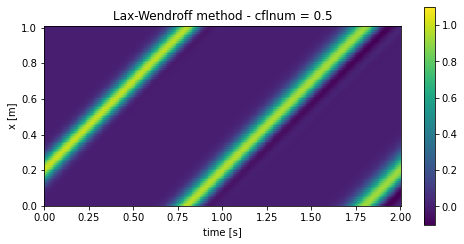

In [24]:
# Q10 spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q, "image_LW.png", 'Lax-Wendroff method - cflnum = %.1f' %cflnum)

In [25]:
# Q10. Lax Wendroff solver - V2

import scipy.sparse as sp

# --------------------------------------------------------

a      = 1
cflnum = 0.5          # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

# --------------------------------------------------------

def interp_LW_op(a, m, dx, dt):
    
    """ operator of L-W interpolation 
            of the advective flux  """
    
    k = a*dt/dx
    
    AInt = sp.diags([1+k, 1-k], [0, 1], (m-1, m)).toarray()
    AInt = (a*.5)*AInt
    
    return AInt

def LWs_matrix(a, x, dx, dt):
    
    """  The Lax-Wendroff 
            matrix """
    
    m = len(x)
    
    # Method construction
    AInt = interp_LW_op(a, m, dx, dt)
    Div  = diverg_op(m, dx)
    (TM, coeff_t) = time_deriv_op(m, dt)
    
    A = coeff_t * (TM - Div@AInt)

    # periodic boundary conditions
    ## line (i = 0)
    A[0,:-1] = A[1,1:]
    A[0,-2]  = A[1,0]
    
    ## line (i = -1)
    A[-1,:]  = A[0,:]
    
    return (A)

A_LW   = LWs_matrix(a, x, dx, dt)

print("Number of iterations : %.f" %(T/dt))

(q, Q) = t_marching(A_LW, x, t0, T, dt, q_0)

print('\nVerification stability : q(x=1,t_F) = ', q[-1]) 

Number of iterations : 400

Verification stability : q(x=1,t_F) =  0.01992851772068595


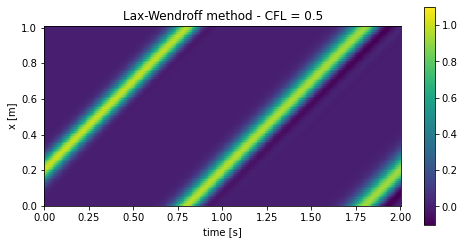

In [26]:
# Q10 spatio-temporal diagram

t = np.linspace(t0, T, int((T-t0)/dt+1))

spatio_temp(t, x, dt, dx, Q, "image_LW.png", 'Lax-Wendroff method - CFL = %.1f' %cflnum)

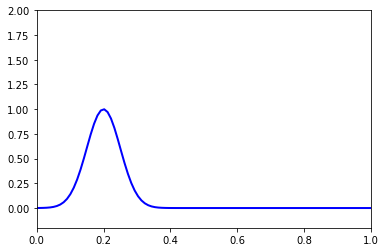

In [27]:
# Live animation

fig    = plt.figure()
ax     = plt.axes(xlim=(0, 1), ylim=(-0.2,2))
line1, = ax.plot([],[], '-b', lw=2)

skip = 4

def fplot(i):
    line1.set_data(x[:], Q[i*skip])
    return line1, 

anim = animation.FuncAnimation(fig, fplot, frames=range(len(Q)//skip))
HTML(anim.to_jshtml())

#### Influence over cflnum

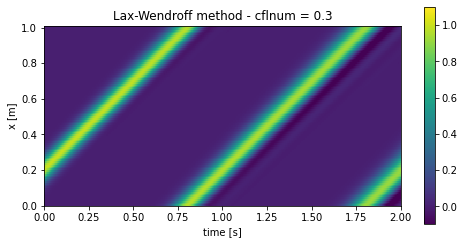

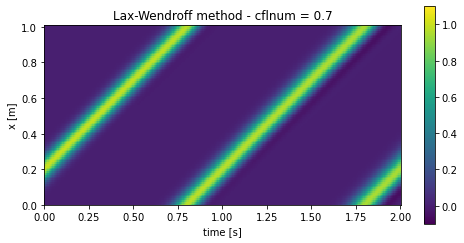

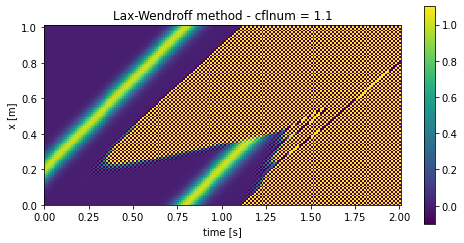

In [34]:
# Influence over cflnum

N      = 3 # Number of cflnum to test out
gap    = 2
offset = 0.2

cflnum = np.array([((gap*2)*k+1)*0.1+offset for k in range(N)]) # nu = cflnum so we might ensure cflnum <= 1
dt     = cflnum*dx/a  # the time step is defined using a CFL criteria (cflnum)

for delta_t in dt:
    
    (q, Q)  = q_LW(a, x, dx, t0, T, delta_t)

    t = np.linspace(t0, T, int((T-t0)/delta_t+1))
    spatio_temp(t, x, delta_t, dx, Q, "image_LF.png", "Lax-Wendroff method - cflnum = %.1f" %(a*delta_t/dx))

fig.tight_layout()    

One can see that the scheme is more stable until cflnum but is unstable as well when $\nu > 1$. The condition $\nu \leq 1$ is then as well a necessary and sufficient condition for the Lax-Wendroff scheme.

### 6. Comparison of the different methods

**Questions**

11. <span style="color:blue"> compare the exact solution with approximations obtained from the three aforementioned methods for $t=0.5$ and $t=2$. </span> 

11. <span style="color:blue"> do the same for the discontinuous initial condition.</span> 

11. <span style="color:blue"> what is the influence of the Courant number? Try $\nu=0.75$ or $\nu=1$  for example. (Take care to the number of time steps that has to be an integer!) </span> 


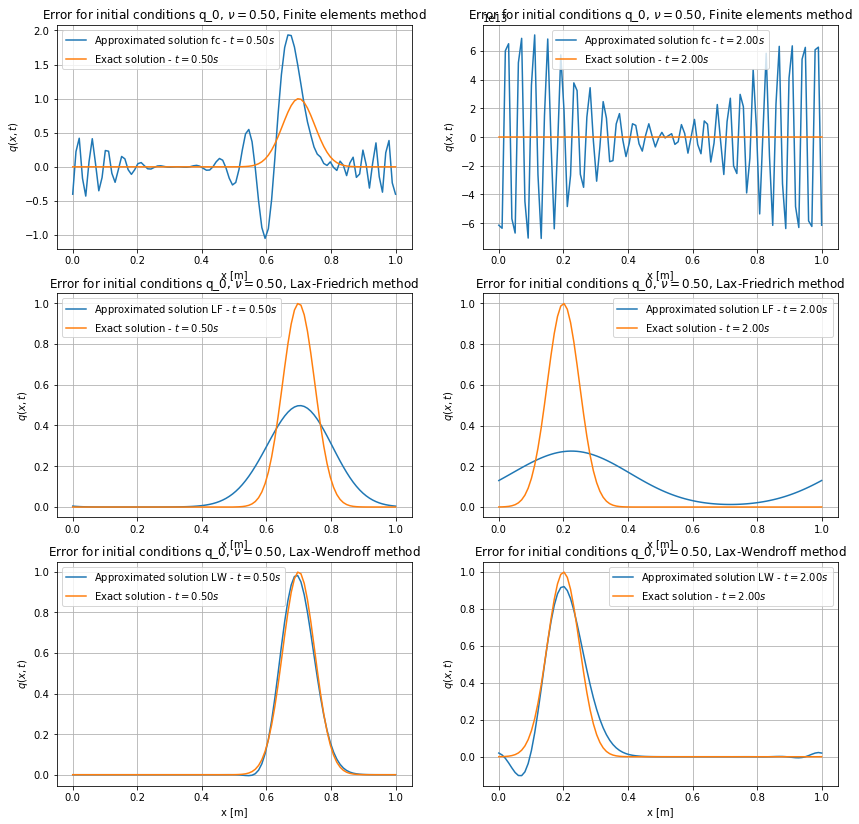

In [29]:
# Q11 - Comparison methods

def plot_comp(cflnum, T1, T2, qinit, a, x, dx, dt):

# --------------------------------------------------------------

    plt.figure(figsize=(14,14))

    # T1
    
    A_FC   = fcs_matrix(a, x, dx, dt)
    A_LF   = LFs_matrix(a, x, dx, dt)
    A_LW   = LWs_matrix(a, x, dx, dt)

    q_exact      = qinit(np.mod(x - a*T1, 1))
    (q_FC, Q_FC) = t_marching(A_FC, x, t0, T1, dt, qinit)
    (q_LF, Q_LF) = t_marching(A_LF, x, t0, T1, dt, qinit)
    (q_LW, Q_LW) = t_marching(A_LW, x, t0, T1, dt, qinit)

    # Display results
    
    #
    plt.subplot(321)
    plt.plot(x, q_FC, label = r'Approximated solution fc - $t = %1.2f s$' %T1)
    plt.plot(x, q_exact, label = r'Exact solution - $t = %1.2f s$' %T1)
    
    plt.title('Error for initial conditions '+q_0.__name__+r', $\nu = %1.2f$' %cflnum+', Finite elements method')
    plt.ylabel(r'$q(x,t)$')
    plt.xlabel('x [m]')

    plt.legend()
    plt.grid('True')
    
    #
    plt.subplot(323)
    plt.plot(x, q_LF, label = r'Approximated solution LF - $t = %1.2f s$' %T1)
    plt.plot(x, q_exact, label = r'Exact solution - $t = %1.2f s$' %T1)
    
    plt.title('Error for initial conditions '+q_0.__name__+r', $\nu = %1.2f$' %cflnum+', Lax-Friedrich method')
    plt.ylabel(r'$q(x,t)$')
    plt.xlabel('x [m]')
    
    plt.legend()
    plt.grid('True')
    
    #
    plt.subplot(325)
    plt.plot(x, q_LW, label = r'Approximated solution LW - $t = %1.2f s$' %T1)
    plt.plot(x, q_exact, label = r'Exact solution - $t = %1.2f s$' %T1)
    
    plt.title('Error for initial conditions '+q_0.__name__+r', $\nu = %1.2f$' %cflnum+', Lax-Wendroff method')
    plt.ylabel(r'$q(x,t)$')
    plt.xlabel('x [m]')

    plt.legend()
    plt.grid('True')
    
# --------------------------------------------------------------

    # T2
    
    A_FC   = fcs_matrix(a, x, dx, dt)
    A_LF   = LFs_matrix(a, x, dx, dt)
    A_LW   = LWs_matrix(a, x, dx, dt)

    q_exact      = qinit(np.mod(x - a*T2, 1))
    (q_FC, Q_FC) = t_marching(A_FC, x, t0, T2, dt, qinit)
    (q_LF, Q_LF) = t_marching(A_LF, x, t0, T2, dt, qinit)
    (q_LW, Q_LW) = t_marching(A_LW, x, t0, T2, dt, qinit)


    # Display results
    
    #
    plt.subplot(322)
    plt.plot(x, q_FC, label = r'Approximated solution fc - $t = %1.2f s$' %T2)
    plt.plot(x, q_exact, label = r'Exact solution - $t = %1.2f s$' %T2)
    
    plt.title('Error for initial conditions '+q_0.__name__+r', $\nu = %1.2f$' %cflnum+', Finite elements method')
    plt.ylabel(r'$q(x,t)$')
    plt.xlabel('x [m]')
    
    plt.legend()
    plt.grid('True')
    
    #
    plt.subplot(324)
    plt.plot(x, q_LF, label = r'Approximated solution LF - $t = %1.2f s$' %T2)
    plt.plot(x, q_exact, label = r'Exact solution - $t = %1.2f s$' %T2)
    
    plt.title('Error for initial conditions '+q_0.__name__+r', $\nu = %1.2f$' %cflnum+', Lax-Friedrich method')
    plt.ylabel(r'$q(x,t)$')
    plt.xlabel('x [m]')

    plt.legend()
    plt.grid('True')
    
    #
    plt.subplot(326)
    plt.plot(x, q_LW, label = r'Approximated solution LW - $t = %1.2f s$' %T2)
    plt.plot(x, q_exact, label = r'Exact solution - $t = %1.2f s$' %T2)
    
    plt.title('Error for initial conditions '+q_0.__name__+r', $\nu = %1.2f$' %cflnum+', Lax-Wendroff method')
    plt.ylabel(r'$q(x,t)$')
    plt.xlabel('x [m]')

    plt.legend()
    plt.grid('True')
    
    fig.tight_layout()
    
    return
    
cflnum = 0.5
dt     = cflnum*dx/a

T1 = 0.5; T2 = 2.

plot_comp(cflnum, T1, T2, q_0, a, x, dx, dt)

Let's proceed to the graph analysis, method by method :
- Method 1 : Finite element method : presence of discontinuities for low and high time. The CFL condition is then not sufficient to ensure stability. The numerical solution then isn't only unconsistent but unstable as well.

- Method 2: Lax-Friedrich method : Presence of discontinuities only if CFL condition not fulfilled. Moreover, big dissipation as 2nd order term acting as a viscous term. This method is stable and consistent but not for an ideal problem (good if we want to modelise a more physical problem with energy loss).

- Method 3 : Lax-Wendroff method : Acting as Lax-Friedrich method with respect to the CFL number. Nevertheless, we here avoid dissipation through a mathematical approach rather than aphysical one. On the other hand, this method stick to an other reality : the displacement of wave. Even though some local pick might occur on the top of the "wave", the hollow behind the wave is representative of a wave in movement towards the right.

In the end, these last two method are stable and leaad to different physical phenomena, derived from two different approaches (mathematical and physical).


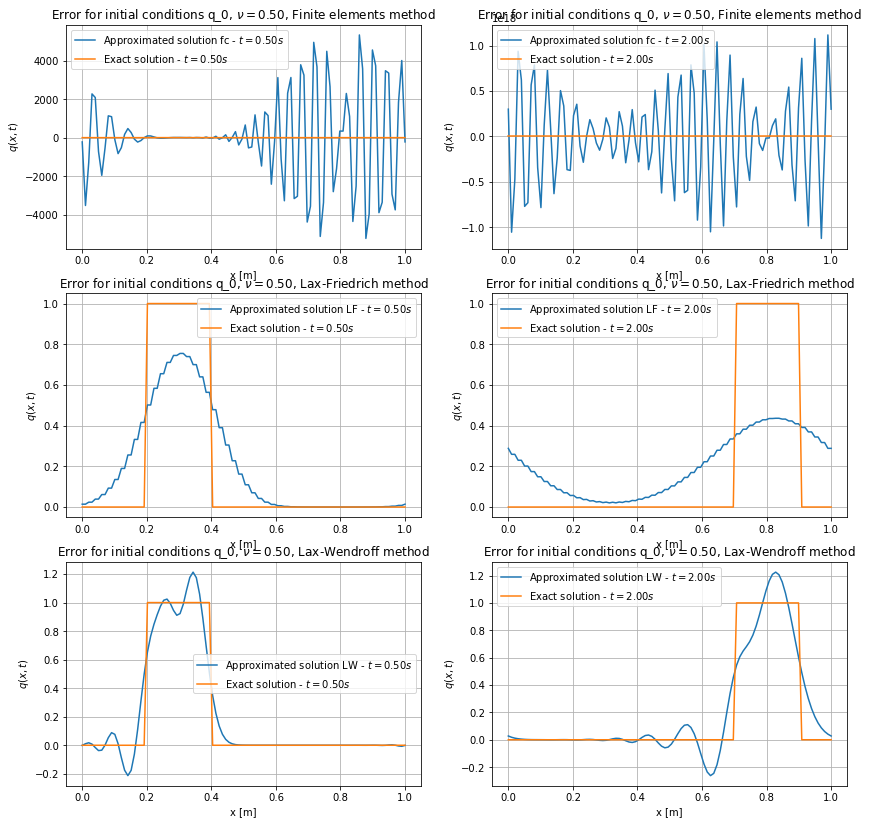

In [30]:
# Q12. Discontinuous initial condition

def q_0_d(x): 
    
    q = np.zeros(len(x))

    idx = (x > .7) * (x < .9)

    q[idx] = 1

    return q

N = 100
x = np.linspace(0, 1, N)  # Spatial grid

cflnum = 0.5
T1 = 0.5; T2 = 2.

plot_comp(cflnum, T1, T2, q_0_d, a, x, dx, dt)
fig.tight_layout()

##### Observation

Each method behavior is as before :
- Method 1 is discontinuous ;
- Method 2 is stable but presents dissipations ;
- Method 3 is stable but presents irregularity to the edges of the initial function ;

This last method is the one that changes the most as we see it's shape really changing throughout time. We avoid dissipation but we increase dispersion. The method is therefore not the best appropriate for discontinuous initial functions.

To finish, we see that the Lax-Friedrich method keeps its behavior and we furthermore see the effectiveness of iterative functions.

Aswe reacll that Lax-Wendroff method was of higher precision, we see that this overall higher theoretical precision doesn't prevent dispersion from occuring, and generally speaking the solution from being more irregular.

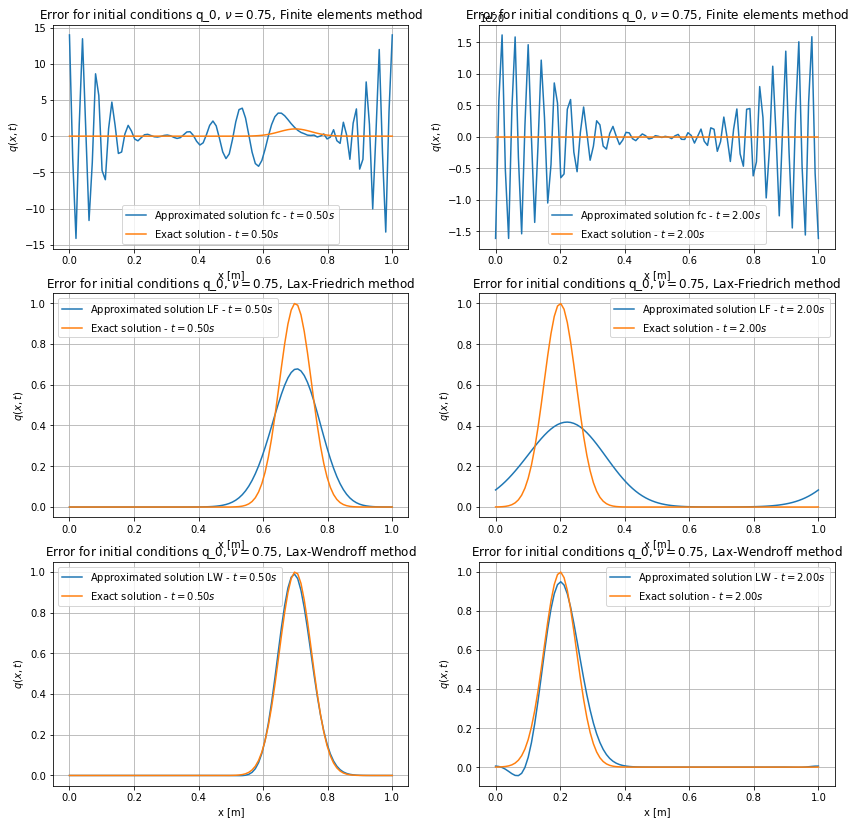

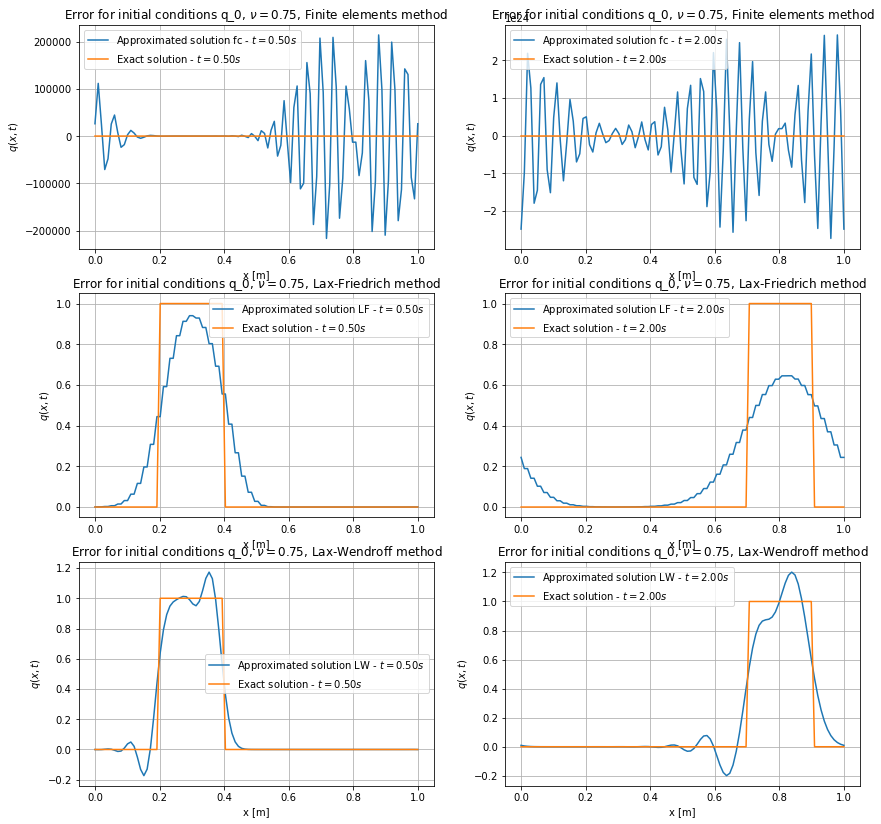

In [31]:
# Q13. Influence of \nu

T1 = 100*dt; T2 = 400*dt

# ---------------------------------------------

# NU_1 = 0.75

cflnum = 0.75
dt = cflnum*dx/a

plot_comp(cflnum, T1, T2, q_0, a, x, dx, dt)
plot_comp(cflnum, T1, T2, q_0_d, a, x, dx, dt)
fig.tight_layout()

### Conclusion $\nu < 1$

As observed on lower CFL number case :
    
- Method 1 is discontinuous, and even more here as we increase $\nu$ ;
- Method 2 is stable but presents dissipations ;
- Method 3 is stable but presents irregularity, i.e. dispersion ;

The solutions remain stable, the CFL number atcing mainly on the time of the study. To be concluded with the higher CFL number case ($\nu = 1$).

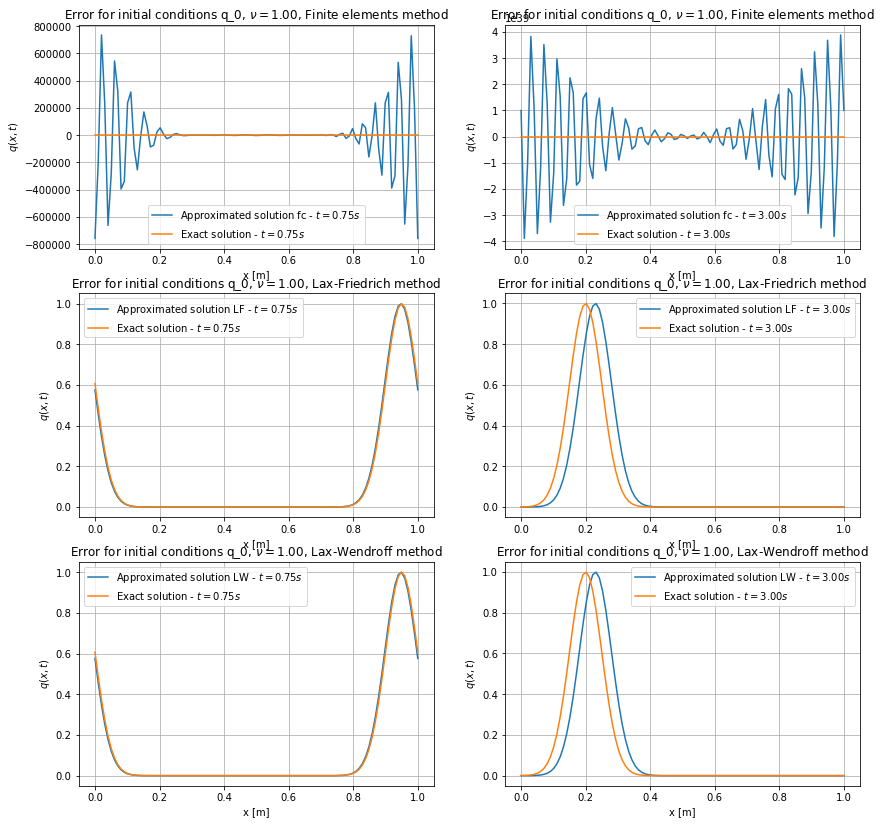

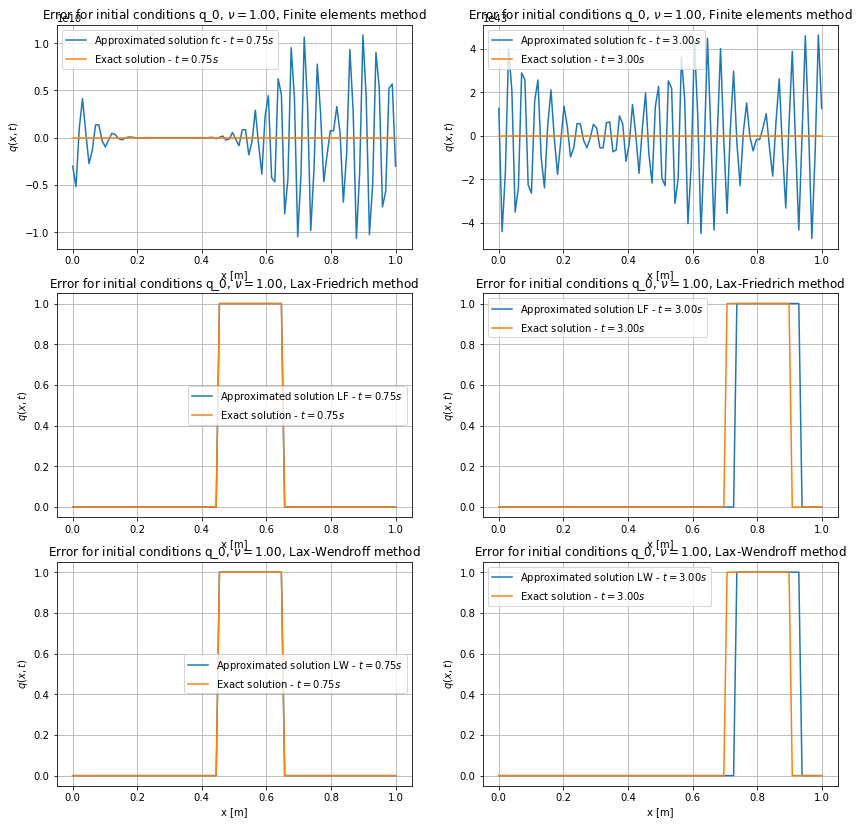

In [32]:
# Q13. Influence of \nu

T1 = 100*dt; T2 = 400*dt

# ----------------------------------------------

# NU_2 = 1.

cflnum = 1.
dt = cflnum*dx/a

plot_comp(cflnum, T1, T2, q_0, a, x, dx, dt)
plot_comp(cflnum, T1, T2, q_0_d, a, x, dx, dt)

### Conclusion $\nu \geq 1$

What changes is that the Lax-Friedrich method acts as the Lax-Wendroff method. In the limit case $\nu = 1$, we then have both methods presenting dispersion, and no dissipation anymore (or too low to see it).

Therfore, in the limit case, both method are similar but they no longer represent a moving solution. At least, the solution is moving very slowly, and this is why the shape looks the same : the solution don't have the time to acts as previously seen.

Therefore, we can rather conclude on the fact that at lower time, both method acts similarly.